In [8]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import tensorflow as tf

# 활성화 함수

## 계단 함수

In [5]:
def step_func(x):

#     if x > 0:
#         return 1
#     else:
#         return 0
# 혹은
#     return x>0     # 출력값이 True 혹은 False로 나온다
    return np.array(x>0, dtype=np.int)    # boolean 타입을 integer로 바꾼다

In [6]:
print(step_func(-3))
print(step_func(5))

0
1


## Sigmoid 함수

In [7]:
def sigmoid(x):    # x는 결과
    return 1 / (1 + np.exp(-x))

In [9]:
x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(x)
y1

array([0.00669285, 0.00739154, 0.00816257, 0.0090133 , 0.0099518 ,
       0.01098694, 0.01212843, 0.01338692, 0.01477403, 0.0163025 ,
       0.01798621, 0.01984031, 0.02188127, 0.02412702, 0.02659699,
       0.02931223, 0.03229546, 0.03557119, 0.03916572, 0.04310725,
       0.04742587, 0.05215356, 0.05732418, 0.06297336, 0.06913842,
       0.07585818, 0.0831727 , 0.09112296, 0.09975049, 0.10909682,
       0.11920292, 0.13010847, 0.14185106, 0.15446527, 0.16798161,
       0.18242552, 0.19781611, 0.21416502, 0.23147522, 0.24973989,
       0.26894142, 0.2890505 , 0.31002552, 0.33181223, 0.35434369,
       0.37754067, 0.40131234, 0.42555748, 0.450166  , 0.47502081,
       0.5       , 0.52497919, 0.549834  , 0.57444252, 0.59868766,
       0.62245933, 0.64565631, 0.66818777, 0.68997448, 0.7109495 ,
       0.73105858, 0.75026011, 0.76852478, 0.78583498, 0.80218389,
       0.81757448, 0.83201839, 0.84553473, 0.85814894, 0.86989153,
       0.88079708, 0.89090318, 0.90024951, 0.90887704, 0.91682

In [10]:
y2 = step_func(x)
y2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

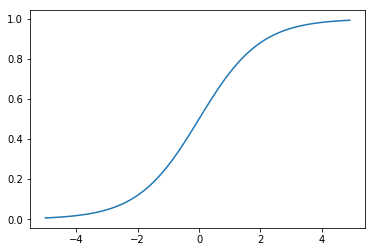

In [11]:
plt.plot(x, y1)

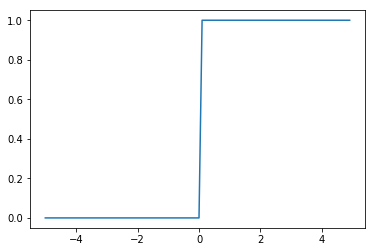

In [12]:
plt.plot(x, y2)

## ReLU 함수

In [13]:
def relu(x):
    return np.maximum(0, x)    # 0하고 x중에 큰 값을 리턴해라

In [14]:
print(relu(-2))
print(relu(5))

0
5


# 다차원 배열의 연산

In [15]:
A = np.array([1, 2, 3, 4])
np.ndim(A)    # ndim: 몇차원 배열인지 출력

1

In [16]:
A.shape

(4,)

In [18]:
B = np.array([[1, 2], [3, 4], [5, 6]])
np.ndim(B)

2

In [19]:
B.shape

(3, 2)

## 행렬의 내적 (행렬곱)

In [20]:
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [3, 4]])
np.dot(A, B)

array([[11, 14],
       [27, 34]])

In [21]:
A = np.array([[1, 2, 3], [3, 4, 5]])    # 2x3    # shape을 찍어봐야 한다
B = np.array([[5, 6], [3, 4], [1, 2]])    # 3x2
np.dot(A, B)    # 2x2

array([[14, 20],
       [32, 44]])

## 신경망 코딩

In [24]:
def nn1(x1, x2):
    X = np.array([x1, x2])    # (2, )
    W = np.array([[1, 3, 5], [2, 4, 6]])    # (2, 3)
    Y = np.dot(X, W)    # (3, )
    return Y

nn1(1, 2)

array([ 5, 11, 17])

## 여러 계층 신경망 코딩

In [27]:
# 첫번째 계층

X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])    # weight의 shape에서 bias는 포함하지 않는다
B1 = np.array([0.1, 0.2, 0.3])    # 출력 개수만큼 bias가 붙는다
A1 = np.dot(X, W1) + B1
Z1 = sigmoid(A1)
Z1

array([0.57444252, 0.66818777, 0.75026011])

In [30]:
# 두번째 계층

W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])    # (3,2)    # weight의 shape에서 bias는 포함하지 않는다
B2 = np.array([0.1, 0.2])    # (2, )    # 출력 개수만큼 bias가 붙는다
A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)
Z2

array([0.62624937, 0.7710107 ])

In [31]:
# 세번째 계층

W3 = np.array([[0.1, 0.3], [0.2, 0.4]])    # weight의 shape에서 bias는 포함하지 않는다
B3 = np.array([0.1, 0.2])    # 출력 개수만큼 bias가 붙는다
A3 = np.dot(Z2, W3) + B3
A3

array([0.31682708, 0.69627909])

# Softmax

In [32]:
a = np.array([0.3, 2.9, 4.0])
exp_a = np.exp(a)
exp_a

array([ 1.34985881, 18.17414537, 54.59815003])

In [34]:
sum_exp_a = np.sum(exp_a)
y = exp_a / sum(exp_a)    # Softmax
y

array([0.01821127, 0.24519181, 0.73659691])

## Softmax로 손글씨 인식

In [35]:
from dataset.mnist import load_mnist

ModuleNotFoundError: No module named 'dataset'

In [36]:
import tensorflow as tf

In [40]:
sess = tf.Session()
hi = tf.constant("hi")
print(sess.run(hi))
print(str(sess.run(hi), encoding="utf-8"))

b'hi'
hi
